In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:

import schedule 
import time 

In [3]:

import pyttsx3
engine = pyttsx3.init()

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []
file_name = 'coco.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip().split()

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic', 'light', 'fire', 'hydrant', 'stop', 'sign', 'parking', 'meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports', 'ball', 'kite', 'baseball', 'bat', 'baseball', 'glove', 'skateboard', 'surfboard', 'tennis', 'racket', 'bottle', 'wine', 'glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'chairs', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell', 'phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy', 'bear', 'hair', 'drier', 'toothbrush']


In [8]:
print(len(classLabels))

92


In [9]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 00000209EB13A930>

In [10]:
img = cv2.imread('car.jpg')

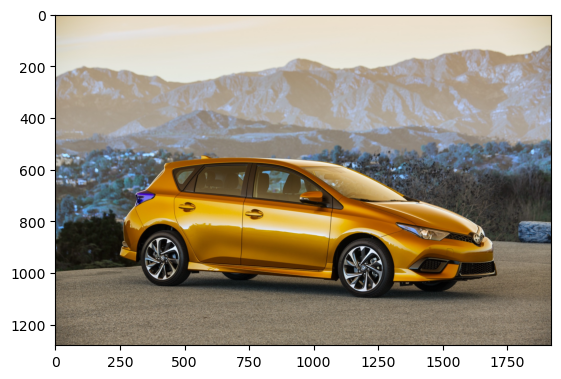

In [11]:
plt.imshow(img)

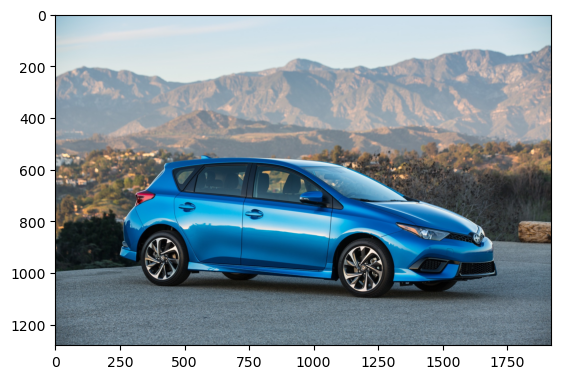

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
print(img.shape)

(1280, 1920, 3)


In [14]:
model.detect(img, confThreshold = 0.5)

(array([3]),
 array([0.8306605], dtype=float32),
 array([[ 230,  542, 1478,  545]]))

In [15]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = 0.5)

In [16]:
print(ClassIndex)

[3]


In [17]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3 )

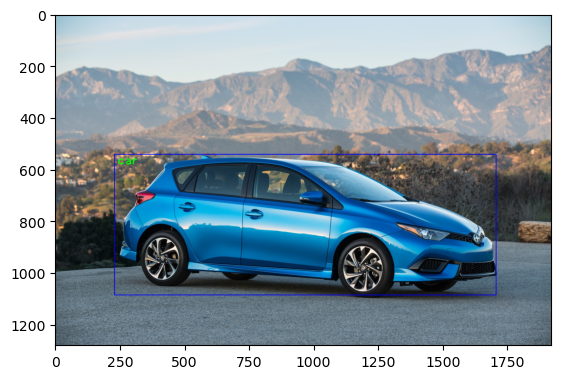

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError ("Cannot open video")
    
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
list = []

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame, classLabels[ClassInd-1],(boxes[0]+10, boxes[1]+40),font, fontScale = font_scale, color = (0,255,0),thickness = 3)
                list.append(classLabels[ClassInd-1])
                list_new = set(list)
                for i in list_new:
                   engine.say(i)
                   engine.runAndWait()
                # def func(): 
    
                #     for i in list_new:
                #         engine.say(i)
                #         engine.runAndWait()

                # schedule.every(0.3).minutes.do(func) 
            
                # while True: 
                #     schedule.run_pending() 
                #     time.sleep(0.3) 
                
                    

    cv2.imshow("Output",frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
 
    

()
()
()
()
()
[77]
()
()
()
()
[77]
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
()
[77]
[72]
[72]
[72]
()
()
()
[72]
[72]
[72]
[1]
[1]
